# Machine Learning Engineer Nanodegree
## Unsupervised Learning
## Project 3: Creating Customer Segments

Welcome to the third project of the Machine Learning Engineer Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` will be excluded in the analysis — with focus instead on the six product categories recorded for customers.

Run the code block below to load the wholesale customers dataset, along with a few of the necessary Python libraries required for this project. You will know the dataset loaded successfully if the size of the dataset is reported.

In [2]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames

# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration
In this section, you will begin exploring the data through visualizations and code to understand how each feature is related to the others. You will observe a statistical description of the dataset, consider the relevance of each feature, and select a few sample data points from the dataset which you will track through the course of this project.

Run the code block below to observe a statistical description of the dataset. Note that the dataset is composed of six important product categories: **'Fresh'**, **'Milk'**, **'Grocery'**, **'Frozen'**, **'Detergents_Paper'**, and **'Delicatessen'**. Consider what each category represents in terms of products you could purchase.

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Implementation: Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. In the code block below, add **three** indices of your choice to the `indices` list which will represent the customers to track. It is suggested to try different sets of samples until you obtain customers that vary significantly from one another.

In [21]:
# print data.iloc[np.random.choice(440, 20, replace=False)]
# I printed out 20 random observations from the data set with the command above and searched by eye to find three
# observations that differed widely in most of their variables. The trio I came up with was 8, 384, and 73.

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [8, 384, 73]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print "Chosen samples of wholesale customers dataset:"
display(samples)

# Display some basic sample statistics for the dataset as a whole.
# This code was suggested to me by the Udacity reviewer who reviewed this project on the first submission.
print "\n Comparison of the samples with the mean of the dataset: "
display(samples - np.round(data.mean()))
print "\n Comparison of the samples with the median of the dataset: "
display(samples - np.round(data.median()))

Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,5963,3648,6192,425,1716,750
1,10683,21858,15400,3635,282,5120
2,19899,5332,8713,8132,764,648



 Comparison of the samples with the mean of the dataset: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-6037.0,-2148.0,-1759.0,-2647.0,-1165.0,-775.0
1,-1317.0,16062.0,7449.0,563.0,-2599.0,3595.0
2,7899.0,-464.0,762.0,5060.0,-2117.0,-877.0



 Comparison of the samples with the median of the dataset: 


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,-2541.0,21.0,1436.0,-1101.0,900.0,-216.0
1,2179.0,18231.0,10644.0,2109.0,-534.0,4154.0
2,11395.0,1705.0,3957.0,6606.0,-52.0,-318.0


### Question 1
Consider the total purchase cost of each product category and the statistical description of the dataset above for your sample customers.  
*What kind of establishment (customer) could each of the three samples you've chosen represent?*  
**Hint:** Examples of establishments include places like markets, cafes, and retailers, among many others. Avoid using names for establishments, such as saying *"McDonalds"* when describing a sample customer as a restaurant.

I have evaluated each customer's spending by comparing expenditures on each feature with the mean and median of the dataset. It appears that the basic trends of spending are the same when compared to either measure, and since the mean and median are less than half a standard deviation away from one another, I have referred in my explanations below to "the average expenditure," although it should be understood that this is representative not only of the mean but also of the median.

Customer 0 spends a lot more on detergents and paper than the other two, and its expenditures on Fresh, Milk, and Grocery are all pretty similar. This looks like it might be some sort of small general purpose store which keeps sells both food items and other household needs (as opposed to a grocery store, which would spend more on food and much less on detergents and paper). Customer 0 is also below average in its spending on all categories, and far below average (by over 6,000) on spending for fresh food. Perhaps this customer sells primarily prepackaged or cooked food.

Customer 1 spends a very large amount on expensive food (Delicatessen), much less on paper, and large amounts on the other food items (Fresh, Milk, Grocery, and Frozen). This customer is below average in spending on Fresh and Detergents_Paper, but above average on the others, and the most above average in its spending on Grocery and Delicatessen. I surmise that this is probably a higher-end grocery store, given the high expenditures on food (including expensive food) and low spending on detergents and paper.

Customer 2 appears to be a large all-purpose low-priced foods store; essentially a bigger version of Customer 0. It spends above average amounts on Fresh, Milk, Grocery, and Frozen, and much less on detergents and paper. I surmise that it's a low-priced food store because of its comparatively low spending on more expensive food (Delicatessen).

### Implementation: Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

In the code block below, you will need to implement the following:
 - Assign `new_data` a copy of the data by removing a feature of your choice using the `DataFrame.drop` function.
 - Use `sklearn.cross_validation.train_test_split` to split the dataset into training and testing sets.
   - Use the removed feature as your target label. Set a `test_size` of `0.25` and set a `random_state`.
 - Import a decision tree regressor, set a `random_state`, and fit the learner to the training data.
 - Report the prediction score of the testing set using the regressor's `score` function.

In [3]:
# TODO: Make a copy of the DataFrame, using the 'drop' function to drop the given feature
new_data = pd.DataFrame(data.drop("Grocery", axis=1))

# TODO: Split the data into training and testing sets using the given feature as the target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, data["Grocery"], test_size=0.25, random_state=1993)

# TODO: Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
regressor = DecisionTreeRegressor()
regressor = regressor.fit(X_train, y_train)

# TODO: Report the score of the prediction using the testing set
score = regressor.score(X_test, y_test)
print score

0.651878475966


### Question 2
*Which feature did you attempt to predict? What was the reported prediction score? Is this feature is necessary for identifying customers' spending habits?*  
**Hint:** The coefficient of determination, `R^2`, is scored between 0 and 1, with 1 being a perfect fit. A negative `R^2` implies the model fails to fit the data.

I tried to predict Grocery, because all but one of the variables are some specific type of food; it seemed likely that more general food-related spending would be correlated with spending on specific types of food.

The R^2 value is the percentage of variability in the response (in this case, Grocery) explained by the available data (the original dataset with Grocery removed). This decision tree regressor returned an R^2 value of approximately 0.6519, which means that about 65.19% of the variation in Grocery can be predicted from the other variables. Given that so much of the variability in Grocery is predictable based on the other variables, it doesn't seem to be a very good identifier for customers' spending habits on its own.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If you found that the feature you attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if you believe that feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data. Run the code block below to produce a scatter matrix.

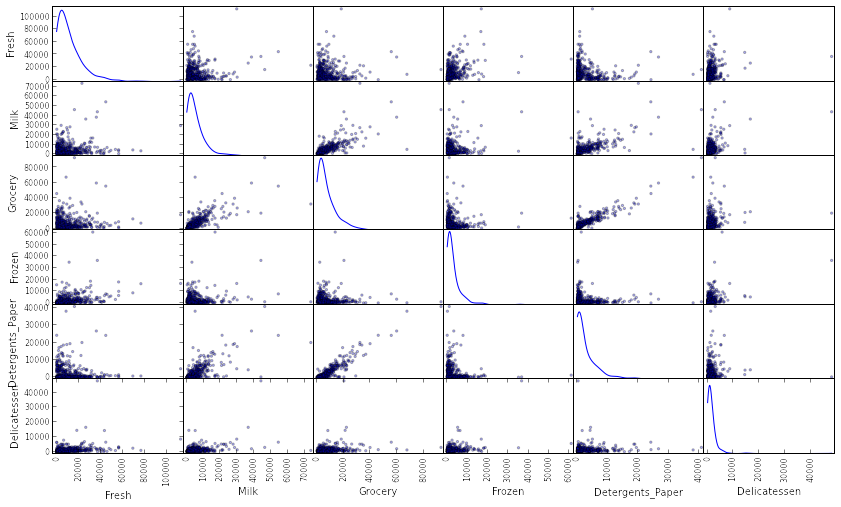

In [15]:
# Produce a scatter matrix for each pair of features in the data
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Question 3
*Are there any pairs of features which exhibit some degree of correlation? Does this confirm or deny your suspicions about the relevance of the feature you attempted to predict? How is the data for those features distributed?*  
**Hint:** Is the data normally distributed? Where do most of the data points lie? 

Grocery and Milk, Grocery and Detergents_Paper, and Detergents_Paper and Milk all show linear correlation. There don't seem to be any other notable trends in the other feature pairs. However, it's hard to say for sure what the correlations between the variables are with this matrix because none of the variables are normally distributed; each of them is heavily right-skewed.

## Data Preprocessing
In this section, you will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers. Preprocessing data is often times a critical step in assuring that results you obtain from your analysis are significant and meaningful.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data. One way to achieve this scaling is by using a [Box-Cox test](http://scipy.github.io/devdocs/generated/scipy.stats.boxcox.html), which calculates the best power transformation of the data that reduces skewness. A simpler approach which can work in most cases would be applying the natural logarithm.

In the code block below, you will need to implement the following:
 - Assign a copy of the data to `log_data` after applying a logarithm scaling. Use the `np.log` function for this.
 - Assign a copy of the sample data to `log_samples` after applying a logrithm scaling. Again, use `np.log`.

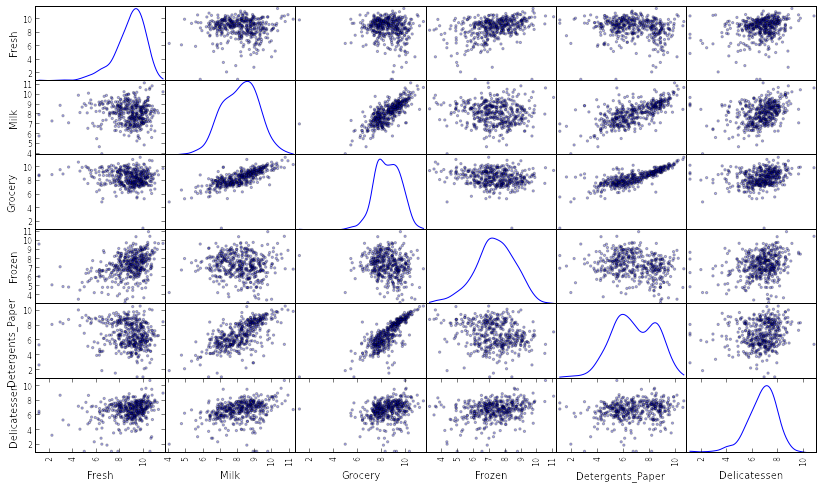

In [9]:
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature should appear much more normal. For any pairs of features you may have identified earlier as being correlated, observe here whether that correlation is still present (and whether it is now stronger or weaker than before).

Run the code below to see how the sample data has changed after having the natural logarithm applied to it.

In [10]:
# Display the log-transformed sample data
display(log_samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,8.693329,8.201934,8.731013,6.052089,7.447751,6.620073
1,9.276409,9.992322,9.642123,8.198364,5.641907,8.540910
2,9.898425,8.581482,9.072571,9.003562,6.638568,6.473891


### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, you will need to implement the following:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [31]:
# This was just some test code to make sure some code I wrote in the next block would work.
feature = log_data.keys()[0]
blah = log_data[log_data[feature] < 3]
print blah.index.values


[ 66  95 218 338]


In [11]:
# Adding my own code: this is an empty list that will contain the indices of the outliers in log_data
# for all variables. This and my other blocks of code are explained in my answer below.
outlier_indices = []

# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # TODO: Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25)
    
    # TODO: Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75)
    
    # TODO: Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    display(log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))])
    
    # Checking to see which side of the outlier boundaries most of the outliers lie for each of 
    # the variables.
    print "\n"
    print "Number of data points considered outliers BELOW the lower outlier boundary for feature '{}':".format(feature)
    print len(log_data[log_data[feature] < Q1 - step])
    
    print "Number of data points considered outliers ABOVE the upper outlier boundary for feature '{}':".format(feature)
    print len(log_data[log_data[feature] > Q3 + step])
    print "\n"
    
    # Now we add the indices of all the outliers for this feature to the outlier_indices list.
    sub_log_data = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    outlier_indices.extend(sub_log_data.index.values)
    
    # Citations for above code block:
    # The idea for this algorithm to identify outliers from multiple variables was mine. However, I found the
    # code to get indices from a pandas dataframe from user Phillip Cloud's answer on this StackExchange thread:
    # http://stackoverflow.com/questions/18358938/list-of-index-values-in-pandas-dataframe
    # And I found the code to append multiple values to a list with .extend() in user poke's answer on this thread:
    # http://stackoverflow.com/questions/20196159/how-to-append-multiple-values-to-a-list-in-python

    
# Now we print out which outliers appeared more than once, and how many times they appeared (and where).
for index in list(set(outlier_indices)):
    if outlier_indices.count(index) > 1:
        print "Outlier index and its number of occurrences: ", [index, outlier_indices.count(index)]
# Citation for above code block:
# I found out how to get the unique values for a list using set() from user lefterav's answer on this
# StackExchange thread: http://stackoverflow.com/questions/12897374/get-unique-values-from-a-list-in-python
# I found out how to get the number of occurrences for a value in a list from this Python tutorial page:
# http://www.tutorialspoint.com/python/list_count.htm

# OPTIONAL: Select the indices for data points you wish to remove
outliers  = [128, 154, 65, 66, 75]

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Fresh':
16
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Fresh':
0


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Milk':
3
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Milk':
1


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Grocery':
2
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Grocery':
0


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Frozen':
9
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Frozen':
1


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Detergents_Paper':
2
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Detergents_Paper':
0


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372




Number of data points considered outliers BELOW the lower outlier boundary for feature 'Delicatessen':
13
Number of data points considered outliers ABOVE the upper outlier boundary for feature 'Delicatessen':
1


Outlier index and its number of occurrences:  [128, 2]
Outlier index and its number of occurrences:  [154, 3]
Outlier index and its number of occurrences:  [65, 2]
Outlier index and its number of occurrences:  [66, 2]
Outlier index and its number of occurrences:  [75, 2]


### Question 4
*Are there any data points considered outliers for more than one feature? Should these data points be removed from the dataset? If any data points were added to the `outliers` list to be removed, explain why.* 

There are 5 outliers which appear in more than one feature, which are printed at the end of the output above: 128, 154, 65, 66, 75. 154 appears 3 times, the rest appear twice. I wrote some code of my own to count the number of times outliers appeared if they showed up for more than one variable.

I also added some of my own code to the default code so that the number of outliers which are ABOVE the upper outlier boundary and BELOW the lower outlier boundary are printed below each feature. I did this because if you look at the graphs of the distributions of each variable, Fresh and Delicatessen are still noticeably left-skewed, and Frozen is slightly, though to a lesser degree. Thus, I expected that for those features, there would be far more outliers below the lower boundary than above the upper boundary. This turned out to be the case.

I propose removing all 5 of the outliers. Doing so will only slightly reduce the size of the dataset from 440 to 435, and will avoid including values that might distort the integrity of the results. Since they all appear for more than one out of only six features, it seems likely that they might cause problems for later analysis if they are not removed.

## Feature Transformation
In this section you will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

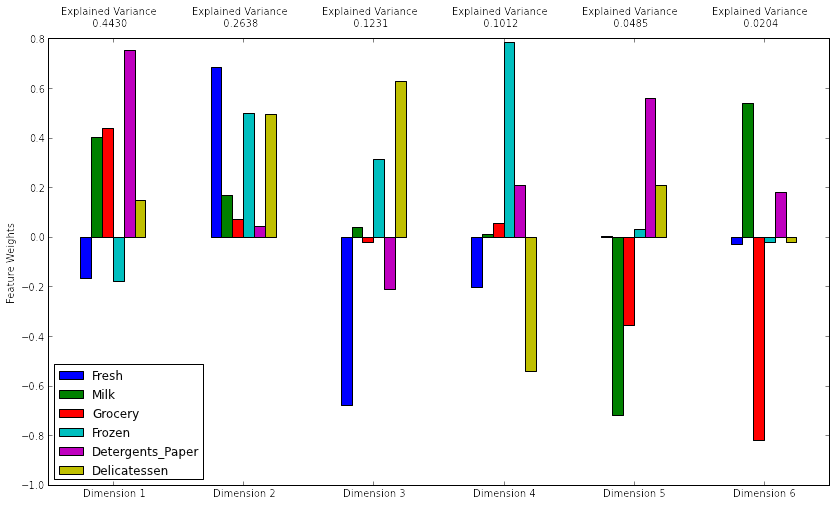

In [19]:
# TODO: Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA

pca = PCA()
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)

### Question 5
*How much variance in the data is explained* ***in total*** *by the first and second principal component? What about the first four principal components? Using the visualization provided above, discuss what the first four dimensions best represent in terms of customer spending.*  
**Hint:** A positive increase in a specific dimension corresponds with an *increase* of the *positive-weighted* features and a *decrease* of the *negative-weighted* features. The rate of increase or decrease is based on the indivdual feature weights.

The first and second principal components together explain 44.3% + 26.38% = 70.68% of the variance in the data. The first four components together explain (by the same type of addition I just did for the first two) about 93.1% of the variability in the data. I describe each of the first four dimensions by category spending below:

1. By far the highest weight is the positive weight for Detergents_Paper, at about 0.78, with Grocery and Milk roughly tied in second place around 0.4. Delicatessen has a small positive weight of about 0.1, while Fresh and Frozen have negative weights of about -0.2.

2. Detergents_Paper drops from being the largest-weighted category to being the smallest, with a positive weight just slightly over 0. Fresh is the highest at a weight of 0.7, and Frozen and Delicatessen are tied at about 0.5. Milk and Grocery have low values between 0 and 0.2.

3. Fresh continues to have the largest (in fact, almost exactly the same) absolute value of weight, although its weight is now negative, at about -0.7. Detergents_Paper has a negative weight of about -0.23, and Grocery and Milk again have tiny values, just below and just above 0, respectively. Frozen and Delicatessen have large positive weights of about 0.3 and 0.62, respectively.

4. Frozen has the largest value of weight seen yet, at almost 0.8. Detergents_Paper has a small positive weight of 0.2, and Grocery and Milk again have tiny values, just above 0. Fresh has a negative weight of around -0.2, and Delicatessen has a larger negative weight of about -0.6.

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it in six dimensions. Observe the numerical value for the first four dimensions of the sample points. Consider if this is consistent with your initial interpretation of the sample points.

In [20]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,0.8636,-0.6650,-0.5376,-0.7922,0.1551,-0.0344
1,0.4323,2.0457,1.3875,-0.5722,-1.9900,-0.2432
2,-0.1922,1.6200,-0.3360,1.2134,-0.6207,-0.3501


### Implementation: Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

In the code block below, you will need to implement the following:
 - Assign the results of fitting PCA in two dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of `good_data` using `pca.transform`, and assign the reuslts to `reduced_data`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

In [36]:
# TODO: Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca = pca.fit(good_data)

# TODO: Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)

# TODO: Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

### Observation
Run the code below to see how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Observe how the values for the first two dimensions remains unchanged when compared to a PCA transformation in six dimensions.

,Dimension 1,Dimension 2
0,0.8636,-0.6650
1,0.4323,2.0457
2,-0.1922,1.6200


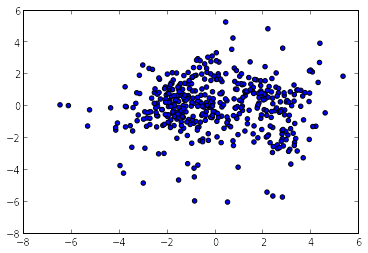

In [28]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))


# I added this code below to plot the two-dimensional reduced data so that I could answer the clustering question.
# I found out how to do scatter plots in Python here: http://matplotlib.org/examples/shapes_and_collections/scatter_demo.html
import matplotlib.pyplot as plt
plt.scatter(reduced_data["Dimension 1"], reduced_data["Dimension 2"])
plt.show()

## Clustering

In this section, you will choose to use either a K-Means clustering algorithm or a Gaussian Mixture Model clustering algorithm to identify the various customer segments hidden in the data. You will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

### Question 6
*What are the advantages to using a K-Means clustering algorithm? What are the advantages to using a Gaussian Mixture Model clustering algorithm? Given your observations about the wholesale customer data so far, which of the two algorithms will you use and why?*

The K-Means clustering algorithm has the advantage of being both simple and relatively fast. Because it seeks only an approximate solution to the clustering problem (by finding local optima for dividing the clusters) rather than getting an exact answer, the algorithm can run quickly. Additionally, it is guaranteed to converge at some point. Two disadvantages of K-Means clustering are that it isn't guaranteed to find the best solution, because its discovery of local optima is dependent on the random placement of the initial k means, and that it requires that each data point be assigned definitively to just one cluster. This means that data points which are in-between clusters and could arguably go with either one are assigned to one cluster or the other mainly based on the initial random placement of the means.

The Gaussian Mixture Model (GMM) clustering algorithm helps to solve the second problem by assigning points to clusters probabilistically rather than with certainty. It's essentially a generalization of the K-Means clustering algorithm, and allows for the assumption that the clusters may not be spherical and may not have the same probability. This allows for more flexibility in clustering, with the trade-off that there may be less certainty for the cluster assignment of a given point.

I've decided to use the K-Means clustering algorithm. For this problem, the distributor's first goal needs to be to get a rough idea of what broad groups its customers might fall into, and whether any of these groups are more or less likely to prefer 3-day delivery. Given how closely packed together the data is in the scatterplot above, using a GMM algorithm would give us more precision about individual customers, but probably make it harder to make a clear division of the data. The K-Means clustering algorithm is better for initially getting an idea of what general trends there are in the data. Later on, if the distributor is interested in making estimates about clusters individual customers fall into, I would recommend using the GMM algorithm.

In writing this summary of K-Means and GMM clustering algorithms, I have referred to the following resources:
1. Berkeley Lecture on Clustering by Sriram Sankararaman, http://people.eecs.berkeley.edu/~jordan/courses/pml/lectures/clustering/slides.pdf
2. "Introduction to Statistical Learning in R", http://www-bcf.usc.edu/~gareth/ISL/ISLR%20Fourth%20Printing.pdf

### Implementation: Creating Clusters
Depending on the problem, the number of clusters that you expect to be in the data may already be known. When the number of clusters is not known *a priori*, there is no guarantee that a given number of clusters best segments the data, since it is unclear what structure exists in the data — if any. However, we can quantify the "goodness" of a clustering by calculating each data point's *silhouette coefficient*. The [silhouette coefficient](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html) for a data point measures how similar it is to its assigned cluster from -1 (dissimilar) to 1 (similar). Calculating the *mean* silhouette coefficient provides for a simple scoring method of a given clustering.

In the code block below, you will need to implement the following:
 - Fit a clustering algorithm to the `reduced_data` and assign it to `clusterer`.
 - Predict the cluster for each data point in `reduced_data` using `clusterer.predict` and assign them to `preds`.
 - Find the cluster centers using the algorithm's respective attribute and assign them to `centers`.
 - Predict the cluster for each sample data point in `pca_samples` and assign them `sample_preds`.
 - Import sklearn.metrics.silhouette_score and calculate the silhouette score of `reduced_data` against `preds`.
   - Assign the silhouette score to `score` and print the result.

In [41]:
# TODO: Apply your clustering algorithm of choice to the reduced data 

# TODO: Predict the cluster for each data point

# TODO: Find the cluster centers

# TODO: Predict the cluster for each transformed sample data point

# TODO: Calculate the mean silhouette coefficient for the number of clusters chosen

# I used the example code on sklearn's page here as a reference for how to calculate the silhouette coefficient.
# http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html#example-cluster-plot-kmeans-silhouette-analysis-py 
# The code below was inspired by a Udacity reviewer's comments and prints out the mean silhouette score for each
# number of clusters.

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

n_clusters_to_try = [2, 3, 4, 5]
for n in n_clusters_to_try:
    np.random.seed(1993)
    clusterer = KMeans(n_clusters=n)
    clusterer = clusterer.fit(reduced_data)
    preds = clusterer.predict(reduced_data)
    
    centers = clusterer.cluster_centers_
    sample_preds = clusterer.predict(pca_samples) # Fixed from fit_predict to just predict
    cluster_labels = clusterer.fit_predict(reduced_data)
    score = silhouette_score(reduced_data, cluster_labels)
    
    print "The mean-silhouette score for", n, "clusters is:", score
    
# Now that we've identified the optimal cluster number, we repeat the body of code above to cluster the data.
np.random.seed(1993)
clusterer = KMeans(n_clusters=2)
clusterer = clusterer.fit(reduced_data)
preds = clusterer.predict(reduced_data)   
centers = clusterer.cluster_centers_

The mean-silhouette score for 2 clusters is: 0.426281015469
The mean-silhouette score for 3 clusters is: 0.39689092645
The mean-silhouette score for 4 clusters is: 0.331245916061
The mean-silhouette score for 5 clusters is: 0.350990778931


### Question 7
*Report the silhouette score for several cluster numbers you tried. Of these, which number of clusters has the best silhouette score?* 

For cluster numbers 2, 3, 4, and 5, the scores I got were 0.4263, 0.3969, 0.3312, and 0.35099. It seems that the cluster number with the best silhouette score is 2.

### Cluster Visualization
Once you've chosen the optimal number of clusters for your clustering algorithm using the scoring metric above, you can now visualize the results by executing the code block below. Note that, for experimentation purposes, you are welcome to adjust the number of clusters for your clustering algorithm to see various visualizations. The final visualization provided should, however, correspond with the optimal number of clusters. 

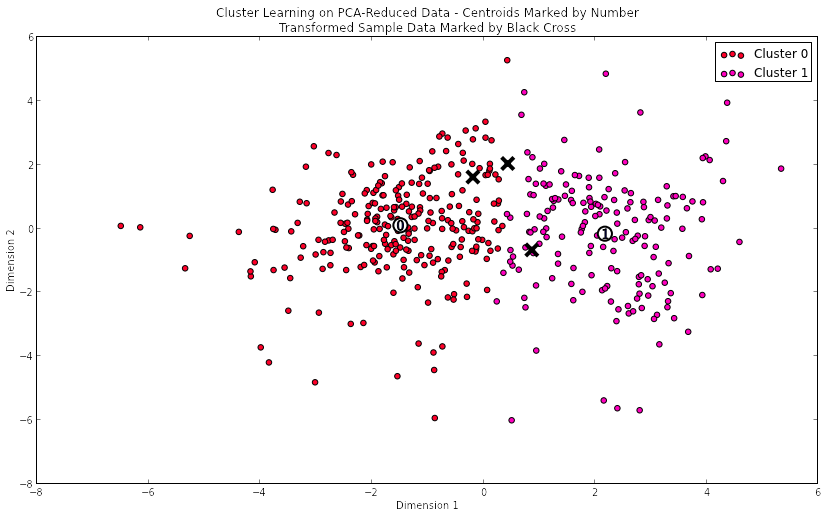

In [42]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

In the code block below, you will need to implement the following:
 - Apply the inverse transform to `centers` using `pca.inverse_transform` and assign the new centers to `log_centers`.
 - Apply the inverse function of `np.log` to `log_centers` using `np.exp` and assign the true centers to `true_centers`.


In [44]:
# TODO: Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# TODO: Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

# Code suggested by Udacity reviewer for comparing the centers to the mean and median of the dataset.
print "\n Comparison of the true centers with the mean of the dataset."
display(true_centers - np.round(data.mean()))
print "\n Comparison of the true centers with the median of the dataset."
display((true_centers - np.round(data.median())))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,8867.0,1897.0,2477.0,2088.0,294.0,681.0
Segment 1,4005.0,7900.0,12104.0,952.0,4561.0,1036.0



 Comparison of the true centers with the mean of the dataset.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,-3133.0,-3899.0,-5474.0,-984.0,-2587.0,-844.0
Segment 1,-7995.0,2104.0,4153.0,-2120.0,1680.0,-489.0



 Comparison of the true centers with the median of the dataset.


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,363.0,-1730.0,-2279.0,562.0,-522.0,-285.0
Segment 1,-4499.0,4273.0,7348.0,-574.0,3745.0,70.0


### Question 8
Consider the total purchase cost of each product category for the representative data points above, and reference the statistical description of the dataset at the beginning of this project. *What set of establishments could each of the customer segments represent?*  
**Hint:** A customer who is assigned to `'Cluster X'` should best identify with the establishments represented by the feature set of `'Segment X'`.

Segment 0 spends by far the vast majority of its money on Fresh, a substantial amount on Frozen, Grocery, and Milk, and little on Detergents_Paper and Delicatessen. When compared to the mean of the dataset, Segment 0 spends less than average on all of the features. It spends slightly above the median on Fresh and Frozen, but below the median on the other four features. Given the above the median spending on those two features (especially when compared with the spending much below the median on those same features in Segment 1), and given that the absolute amount of money spent on Fresh is so high, and also given that the spending on Detergents_Paper is so far below the mean, I would guess that Segment 0 probably represents some sort of grocery store.

Segment 1 spends a lot of money on Grocery and Milk, and roughly equal amounts on Detergents_Paper and Fresh. It spends less on Frozen and Delicatessen. It spends far below the mean and median on fresh, but above the mean and median on Milk and Grocery. It also spends above the mean and median on Detergents_Paper, while Segment 0 spends below these measures on the same feature. Given the high spending on a non-food item (Detergents_Paper), and the lower spending on Fresh, I suspect that Segment 1 probably represents customers who sell food as part of a larger business, but who aren't sellers of raw food - i.e., you might buy cooked or packaged meals from them, but probably not the raw ingredients (hence the low spending on Fresh).

### Question 9
*For each sample point, which customer segment from* ***Question 8*** *best represents it? Are the predictions for each sample point consistent with this?*

Run the code block below to find which cluster each sample point is predicted to be.

In [60]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

Sample point 0 predicted to be in Cluster 1
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


Sample point 0 is predicted to be in Cluster 1, and sample points 1 and 2 are predicted to be in Cluster 0. I predicted at the beginning of this project that point 0 was probably an all-purpose store that primarily sold food, along with other products. I predicted that points 1 and 2 were both grocery stores, with the former being more expensive and the latter selling more varieties at lower costs.

Point 0 mostly aligns with how I described cluster 1, which is an establishment that primarily sells food, but quite a few other products as well. Spending for point 0 is below the mean on all features; for the center of cluster 1, spending is below the mean on Fresh, Frozen, and Delicatessen, but above it for the other features. Points 1 and 2 also align with cluster 0, as I predicted that both of them were grocery stores, which is how I described cluster 0 based on spending information. Point 1 is below the mean on Fresh and Detergents_Paper, and above the mean on Milk, Grocery, Frozen, and Delicatessen, while cluster 0 is below the mean on Fresh, Frozen, and Delicatessen. Point 1 and cluster 0 only agree on Fresh. Point 2 is above the mean on Fresh, Frozen, and Grocery, but below it on Milk, Detergents_Paper, and Delicatessen. Point 2 and cluster 0 agree only on Delicatessen. However, it has to be remembered that cluster 0 is large and pretty diverse (as can be seen by observing its spread in two-dimensions from the PCA cluster graph plotted above).

## Conclusion

### Question 10
*Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how would you use the structure of the data to help them decide on a group of customers to test?*  
**Hint:** Would such a change in the delivery service affect all customers equally? How could the distributor identify who it affects the most?

The center of Segment 0 represents a total expenditure of 16,304, while the center of segment 1 represents a total expenditure of 30,558. Segment 1 is spending almost twice as much as segment 0, which suggests that segment 1 probably sells considerably more per week and needs to have their shelves stocked regularly. My suspicion, then, is that many of the complaints and cancelled deliveries probably came from customers in segment 1. For the A/B test of delivery frequency, I would suggest choosing a target group of about 10% of each of the two segments and testing 3-day delivery with each group, while keeping 5-day delivery for everyone else. Measure what the result is for each group separately. It may well be the case that segment 0, with its much lower spending, may be fine receiving stock less frequently, but segment 1 is likely to want to receive new products often. Testing a small sample from each group and measuring the differences between them could help the distributor to determine whether delivery service times should be changed for both groups, only one (and if so, which one), or neither.

### Question 11
*Assume the wholesale distributor wanted to predict a new feature for each customer based on the purchasing information available. How could the wholesale distributor use the structure of the data to assist a supervised learning analysis?*  
**Hint:** What other input feature could the supervised learner use besides the six product features to help make a prediction?

There are two fairly well-separated clusters in the data - the values for the centers of each cluster are quite different from one another. Thus, it seems reasonable to use Cluster as another input feature for prediction, along with the original six.

### Visualizing Underlying Distributions

At the beginning of this project, it was discussed that the `'Channel'` and `'Region'` features would be excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

Run the code block below to see how each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'` the reduced space. In addition, you will find the sample points are circled in the plot, which will identify their labeling.

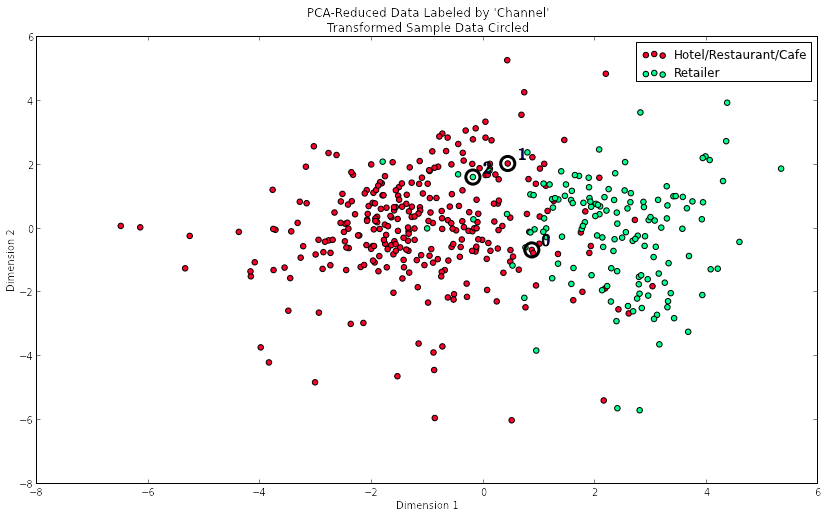

In [61]:
# Display the clustering results based on 'Channel' data
rs.channel_results(reduced_data, outliers, pca_samples)

### Question 12
*How well does the clustering algorithm and number of clusters you've chosen compare to this underlying distribution of Hotel/Restaurant/Cafe customers to Retailer customers? Are there customer segments that would be classified as purely 'Retailers' or 'Hotels/Restaurants/Cafes' by this distribution? Would you consider these classifications as consistent with your previous definition of the customer segments?*

The clustering algorithm I used gives a result very similar to the one above, except that the overlapping parts of the two clusters in my algorithm have some mis-classified points, based on the real data plot above. While there are a few points which belong to one class and show up in the cluster for the other class, for the most part the data is pretty well separated by clusters. For practical purposes, there are customer segments that can be treated as very likely to be Retailers or Hotels/Restaurants/Cafes, but this isn't a completely pure separation: there's a small probability that some members of one group may be in the cluster of the other.

For my predictions of what the segments represented, I got segment 0 partially wrong - I assumed it was higher-priced grocery stores, when it was actually Hotels/Restaurants/Cafes. However, my guess wasn't totally off, as food at those establishments often is actually priced higher than at most general retailers. My prediction for segment 1 was correct; I guessed that customers in that group were retailers who sold large quantities of food without much specialization, which is confirmed by the fact that these customers are actually grocery stores.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.